In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dropout, LSTM, Dense

In [3]:
company = 'AAPL'

startdate = dt.datetime(2010,1,1)
enddate = dt.datetime(2020,1,1)


In [4]:
data = web.DataReader(company, 'yahoo', startdate, enddate)


In [5]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [6]:
prediction_days = 120

x_train = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [7]:
model = Sequential()

model.add(LSTM(units = 20, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))                                                    #Actual prediction outcome neuron

model.compile(optimizer= 'adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs= 100, batch_size= 64)

Epoch 1/100
38/38 [==============================] - 11s 75ms/step - loss: 0.0428
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0033
Epoch 3/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0025
Epoch 4/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0022
Epoch 5/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0020
Epoch 6/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0019
Epoch 7/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0018
Epoch 8/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0017
Epoch 9/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0016
Epoch 10/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0015
Epoch 11/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0014
Epoch 13/100
38/38 [====

In [8]:
teststart = dt.datetime(2020,1,1)
testend = dt.datetime.now()

test_data = web.DataReader(company, 'yahoo', teststart, testend)
actual_prices = test_data['Close'].values

In [9]:
total_dataset = pd.concat([data['Close'], test_data['Close']])


In [10]:
model_inputs = total_dataset[len(total_dataset)- len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [11]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [12]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

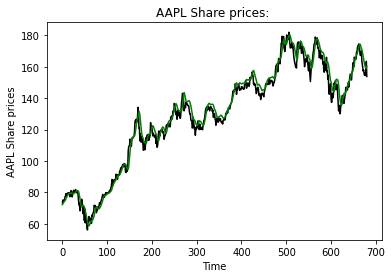

In [13]:
plt.plot(actual_prices, color= "black", label= f"Actual {company} Prices: ")
plt.plot(predicted_prices, color= "green", label= f"Predicted {company} Prices: ")
plt.title(f"{company} Share prices: ")
plt.xlabel("Time")
plt.ylabel(f"{company} Share prices")
plt.show()


In [14]:
real_data = [model_inputs[len(model_inputs) - prediction_days: (len(model_inputs) + 1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))


In [15]:
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction}")


Prediction: [[160.49025]]
